In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']= (12,6)

In [5]:
pwd

'C:\\Users\\sethw'

In [6]:
cd Desktop\Caltech Bootcamp\Machine Learning\Caltech OSL Datasets\Lesson_5\Datasets

C:\Users\sethw\Desktop\Caltech Bootcamp\Machine Learning\Caltech OSL Datasets\Lesson_5\Datasets


In [7]:
df = pd.read_csv('driver-data.csv')

In [8]:
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [11]:
df.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041523,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [12]:
from sklearn.cluster import KMeans

In [13]:
kmeans = KMeans(n_clusters=2) #minimum of 2 clusters
df_analyze = df.drop('id', axis=1) # droping id column as it has no valuable information for clustering

In [15]:
kmeans.fit(df_analyze)

KMeans(n_clusters=2)

In [16]:
kmeans.cluster_centers_

array([[180.017075  ,  18.29      ],
       [ 50.04763438,   8.82875   ]])

In [17]:
print(kmeans.labels_)
print(len(kmeans.labels_))

[1 1 1 ... 0 0 0]
4000


In [18]:
print(type(kmeans.labels_))
unique,counts = np.unique(kmeans.labels_,return_counts=True)
print(dict(zip(unique,counts)))

<class 'numpy.ndarray'>
{0: 800, 1: 3200}


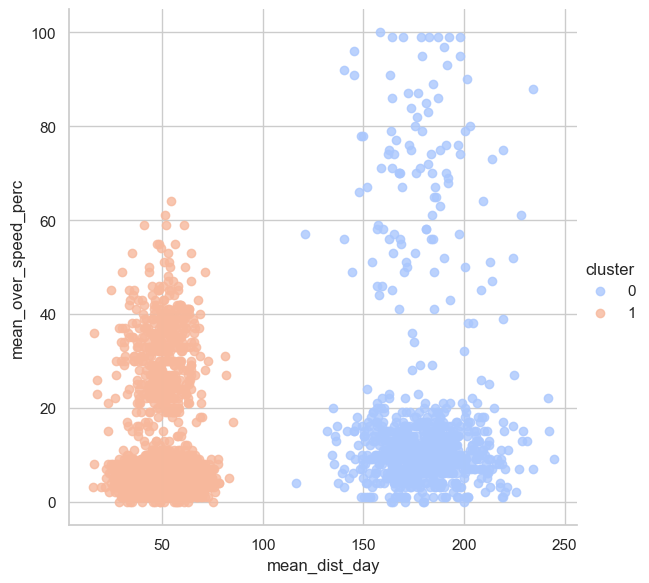

In [29]:
df_analyze['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('mean_dist_day','mean_over_speed_perc',data=df_analyze,
           hue='cluster',palette='coolwarm',size=6,aspect=1,fit_reg=False)

In [30]:
kmeans_4 = KMeans(n_clusters=4)
kmeans_4.fit(df_analyze)
print(kmeans_4.cluster_centers_)
unique,counts = np.unique(kmeans_4.labels_,return_counts=True)

kmeans_4.cluster_centers_
print(dict(zip(unique,counts)))

[[ 4.99842847e+01  5.21441441e+00  1.00000000e+00]
 [ 1.80343118e+02  1.05201149e+01 -3.66373598e-15]
 [ 5.04612706e+01  3.24282353e+01  1.00000000e+00]
 [ 1.77835096e+02  7.02884615e+01  1.66533454e-15]]
{0: 2775, 1: 696, 2: 425, 3: 104}


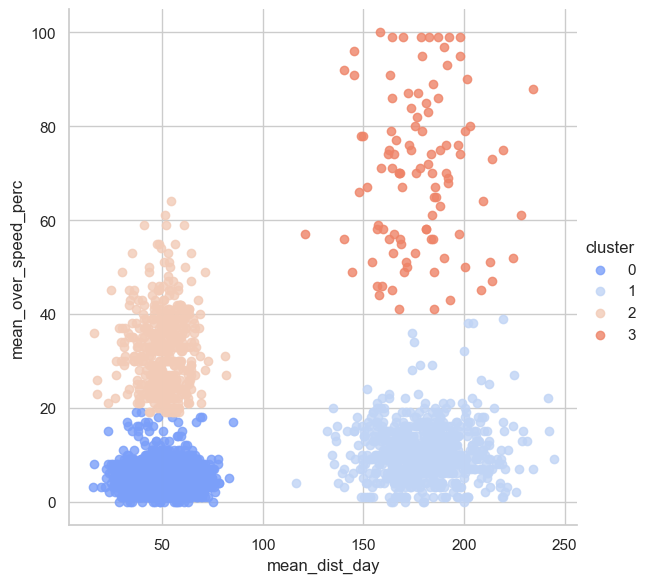

In [33]:
df_analyze['cluster'] = kmeans_4.labels_
sns.set_style('whitegrid')
sns.lmplot('mean_dist_day','mean_over_speed_perc',data=df_analyze,
           hue='cluster',palette='coolwarm',size=6,aspect=1,fit_reg=False)